# Table of Contents

## 01 Importing Libraries
## 02 Importing Dataframe - main
## 03 Preparing Dataframe
### Adding Region column
### Creating a subset of unique users
### Remove users with low-activity
## 04 Adding flags
### Age group
### Income group
### Dependants
## 05 Visualizations on Customer Groups
### By Customer counts
#### Age group
#### Income group
#### Dependants
### By Order Volume
#### Total sales per hour of day
#### Orders per hour of day per age group
#### Orders per day of week per age group
## 06 Customer Profile for Marketing
## 07 Stats on New Customer Dataframe
### Age Group
### Income Group
### Familial Status
## 08 Departments (new dataframe)
## 09 Regional Comparison
### Sales per Region Total
### Customers per Age group
### Customers per customer type
### Customers per income group
### Loyal Customers
### Customers per Gender
### Familial Status
## 10 Products Bought
### Per age group
### Per income
### Per gender
### Per customer frequency
### Per region
### Per price range
## 11 Proportion of Sales per Region
## 12 Customer Profile with multiple factors
### Age vs Income
### Age vs Dependants
### Age vs Loyalty
### Loyalty vs Income
## 13 Spending Habits
### Per age group
### Per income group
### Loyalty spending
### Age Group vs Family status
## 14 Exporting the latest dataframe

# 01 Importing Libraries

In [2]:
# Importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# 02 Importing Dataframe

In [4]:
# Importing customer dataframe
path = r'C:\Users\vacgo\Documents\Achievement 4\Instacart Basket Analysis'
orders_products_all = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_all_20241118.pkl'))

# 03 Preparing Dataframe

### Removed first_name and last_name columns to maintain customers privacy. No PII in the dataset

In [7]:
# check dataset shape and columns
orders_products_all.columns

Index(['order_id', 'user_id', 'order_number', 'order_day_of_week',
       'order_hour_of_day', 'days_from_last_order', 'new_customer',
       'product_id', 'add_to_cart_order', 'reordered', 'product_name',
       'aisle_id', 'department_id', 'prices', 'merge_2', 'price_range_loc',
       'busiest_day', 'busiest_days_new', 'busiest_period_of_day', 'max_order',
       'loyalty_flag', 'ave_spent', 'spender', 'median_days_to_order',
       'frequent_cust', 'gender', 'state', 'age', 'date_joined', 'dependants',
       'fam_status', 'income'],
      dtype='object')

In [8]:
orders_products_all.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_from_last_order,new_customer,product_id,add_to_cart_order,reordered,...,spender,median_days_to_order,frequent_cust,gender,state,age,date_joined,dependants,fam_status,income
0,2539329,1,1,2,8,NaN,True,196,1,0,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
1,2539329,1,1,2,8,NaN,True,14084,2,0,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
2,2539329,1,1,2,8,NaN,True,12427,3,0,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
3,2539329,1,1,2,8,NaN,True,26088,4,0,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
4,2539329,1,1,2,8,NaN,True,26405,5,0,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423


In [9]:
orders_products_all.shape

(32404859, 32)

### Add a region column based on state column

In [11]:
# Check values of state column
states_check = sorted(orders_products_all['state'].unique())
states_check

['Alabama',
 'Alaska',
 'Arizona',
 'Arkansas',
 'California',
 'Colorado',
 'Connecticut',
 'Delaware',
 'District of Columbia',
 'Florida',
 'Georgia',
 'Hawaii',
 'Idaho',
 'Illinois',
 'Indiana',
 'Iowa',
 'Kansas',
 'Kentucky',
 'Louisiana',
 'Maine',
 'Maryland',
 'Massachusetts',
 'Michigan',
 'Minnesota',
 'Mississippi',
 'Missouri',
 'Montana',
 'Nebraska',
 'Nevada',
 'New Hampshire',
 'New Jersey',
 'New Mexico',
 'New York',
 'North Carolina',
 'North Dakota',
 'Ohio',
 'Oklahoma',
 'Oregon',
 'Pennsylvania',
 'Rhode Island',
 'South Carolina',
 'South Dakota',
 'Tennessee',
 'Texas',
 'Utah',
 'Vermont',
 'Virginia',
 'Washington',
 'West Virginia',
 'Wisconsin',
 'Wyoming']

In [12]:
# Defining regions
region_1 = ['Maine','New Hampshire','Vermont','Massachusetts','Rhode Island','Connecticut','New York','Pennsylvania','New Jersey']
region_2 = ['Wisconsin','Michigan','Illinois','Indiana','Ohio','North Dakota','South Dakota','Nebraska','Kansas','Minnesota','Iowa','Missouri']
region_3 = ['Delaware','Maryland','District of Columbia','Virginia','West Virginia','North Carolina','South Carolina','Georgia','Florida','Kentucky','Tennessee','Mississippi','Alabama','Oklahoma','Texas','Arkansas','Louisiana']
region_4 = ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']

In [13]:
# Assigning regions to the states
orders_products_all.loc[orders_products_all['state'].isin(region_1), 'region'] = 'Region 1'

In [14]:
orders_products_all.loc[orders_products_all['state'].isin(region_2), 'region'] = 'Region 2'

In [15]:
orders_products_all.loc[orders_products_all['state'].isin(region_3), 'region'] = 'Region 3'

In [16]:
orders_products_all.loc[orders_products_all['state'].isin(region_4), 'region'] = 'Region 4'

In [17]:
orders_products_all['region'].value_counts()

region
Region 3    10791885
Region 4     8292913
Region 2     7597325
Region 1     5722736
Name: count, dtype: int64

In [18]:
# Check for null values
orders_products_all['region'].isnull().sum()

0

In [19]:
# Check the created column with states
orders_products_all[['state','region']].head()

,state,region
0,Alabama,Region 3
1,Alabama,Region 3
2,Alabama,Region 3
3,Alabama,Region 3
4,Alabama,Region 3


### Check whether spending habits vary per region
## Create dataframe with unique users

In [21]:
# Keep only one row per user_id
unique_users = orders_products_all.drop_duplicates(subset='user_id')

In [22]:
# Crosstab of region vs spender columns
crosstab_spender = pd.crosstab(unique_users['region'], unique_users['spender'], dropna = False)

In [23]:
crosstab_spender.to_clipboard()

#### Data pasted in Excel

### Remove users with low-activity (less than 5 orders)

In [26]:
# Group by user_id for low-activity exclusion flag
orders_products_all.loc[orders_products_all['max_order'] >= 5, 'low_activity_flag'] = 'High activity'

In [27]:
orders_products_all.loc[orders_products_all['max_order'] < 5, 'low_activity_flag'] = 'Low activity'

In [28]:
orders_products_all['low_activity_flag'].value_counts()

low_activity_flag
High activity    30964564
Low activity      1440295
Name: count, dtype: int64

In [29]:
orders_products_all[['max_order', 'low_activity_flag']].head()

,max_order,low_activity_flag
0,10,High activity
1,10,High activity
2,10,High activity
3,10,High activity
4,10,High activity


In [30]:
# Check for null values
orders_products_all['low_activity_flag'].isnull().sum()

0

In [31]:
# Create a subset that excludes low activity
orders_products_all_high = orders_products_all[orders_products_all['low_activity_flag'] == 'High activity']

In [32]:
orders_products_all_high.shape

(30964564, 34)

In [33]:
# Remove low_activity_flag column for the subset
orders_products_all_clean= orders_products_all_high.drop(columns = 'low_activity_flag')

In [36]:
# Exporting the subdataframe to pickle
orders_products_all_clean.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_all_high_20241118.pkl'))

#### Sub-dataframe exported

# 04 Adding flags on dataframe
### by age

#### Rename dataframe to shorten name

In [60]:
df = orders_products_all_clean

In [61]:
# Classifying per age group
df['age'].value_counts().sort_index()

age
18    478457
19    496077
20    480194
21    489116
22    490811
       ...  
77    477999
78    471119
79    508337
80    492750
81    485847
Name: count, Length: 64, dtype: int64

In [62]:
# Create new column for age group
# Peng, Yanfang & ZHU, QIN & Biye, Wang & Ren, Jie. (2020). A cross-sectional study on interference control: age affects reactive control but not proactive control. PeerJ. 8. e8365. 10.7717/peerj.8365. 
df.loc[df['age'] < 18, 'age_group'] = 'Minor'

In [63]:
df.loc[(df['age'] >= 18) & (df['age'] < 26), 'age_group'] = 'Young Adult'

In [64]:
df.loc[(df['age'] >= 26) & (df['age'] <= 45), 'age_group'] = 'Adult'

In [65]:
df.loc[(df['age'] >= 46) & (df['age'] <= 65), 'age_group'] = 'Old Adult'

In [66]:
df.loc[df['age'] > 65, 'age_group'] = 'Senior'

In [67]:
df['age_group'].value_counts()

age_group
Adult          9702539
Old Adult      9666673
Senior         7730834
Young Adult    3864518
Name: count, dtype: int64

In [68]:
print(df['age_group'].isnull().sum())

0


### age group frequency of orders stats

In [69]:
# Check how frequently each age group shop
df.groupby('age_group').agg({'days_from_last_order': ['mean', 'min', 'max']})

days_from_last_order           
                            mean  min   max
age_group                                  
Adult                  10.816670  0.0  30.0
Old Adult              10.820200  0.0  30.0
Senior                 10.795536  0.0  30.0
Young Adult            10.799071  0.0  30.0

### Age group prices stats

In [70]:
# Check how much each age group shop
df.groupby('age_group').agg({'prices': ['mean', 'min', 'max']})

prices           
                 mean  min   max
age_group                       
Adult        7.788906  1.0  25.0
Old Adult    7.791559  1.0  25.0
Senior       7.794342  1.0  25.0
Young Adult  7.784889  1.0  25.0

### customer profile by income

In [72]:
# Creating income profile
# based from https://www.fool.com/money/personal-finance/articles/does-your-income-make-you-upper-class-middle-class-or-lower-class-2/

df.loc[df['income'] <= 30000, 'income_group'] = 'Low'

In [73]:
df.loc[(df['income'] > 30000) & (df['income'] <= 153000), 'income_group'] = 'Middle'

In [74]:
df.loc[df['income'] > 153000, 'income_group'] = 'High'

In [75]:
df['income_group'].value_counts()

income_group
Middle    27409035
High       3361397
Low         194132
Name: count, dtype: int64

In [76]:
df['income_group'].isnull().sum()

0

### by dependants

In [78]:
# Creating customer profile by dependants
df.loc[df['dependants'] > 0 ,'dependants_flag'] = 'Has Dependants'

In [79]:
df.loc[df['dependants'] == 0 ,'dependants_flag'] = 'No Dependants'

In [80]:
df['dependants_flag'].value_counts()

dependants_flag
Has Dependants    23224883
No Dependants      7739681
Name: count, dtype: int64

In [81]:
df['dependants_flag'].isnull().sum()

0

# 05 Visualizations on Customers Groups

## By customer counts

In [83]:
# Create dataframe only with unique user_ids
df_unique = df.drop_duplicates(subset='user_id')

### Users by age group

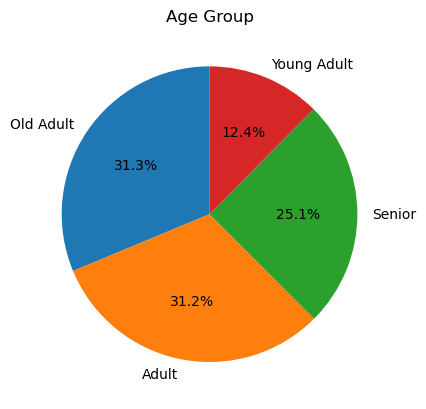

In [135]:
# Pie chart of users by age group

# create data: an array of values
age_groups_pie = df_unique['age_group'].value_counts()

# Create a pieplot
pie_age=age_groups_pie.plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Age Group')
plt.ylabel('')
plt.show()

In [65]:
# Export Pie chart
pie_age.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','pie_age_group.png'))

### Users by income

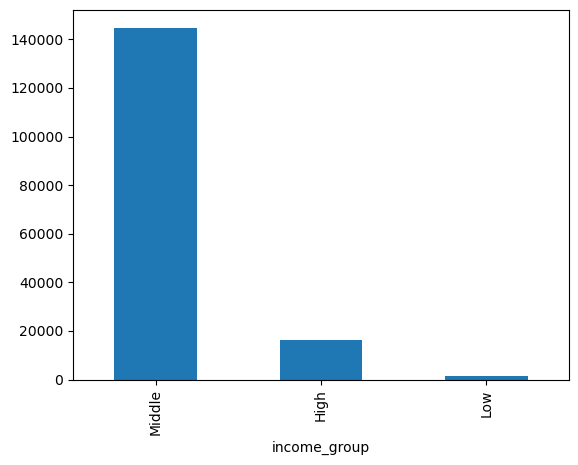

In [131]:
bar_income = df_unique['income_group'].value_counts().plot.bar()

In [133]:
bar_income.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','bar_income_group.png'))

### User dependants

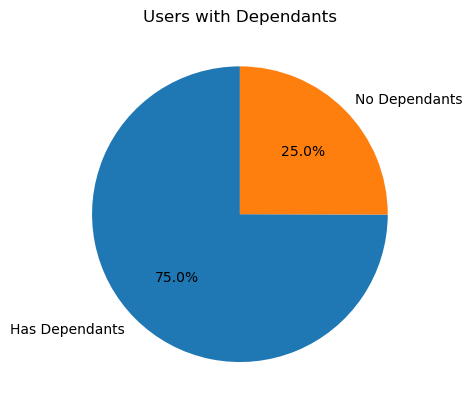

In [153]:
# Pie chart of users with dependants

# create data: an array of values
dependants_pie = df_unique['dependants_flag'].value_counts()

# Create a pieplot
pie_dep=dependants_pie.plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Users with Dependants')
plt.ylabel('')
plt.show()

## Order Volume

### Most spent per Hour of Day

In [128]:
# Only get the columns needed for the line chart order day
df_line_hour = small[['order_hour_of_day', 'prices']]
df_line_hour_2 = df_line_hour.groupby('order_hour_of_day').size().reset_index(name='count')

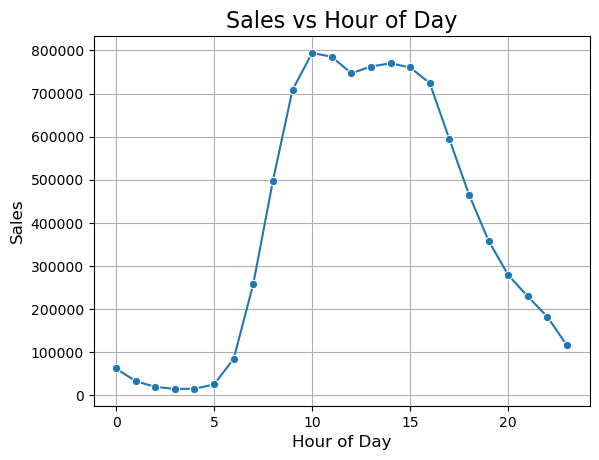

In [129]:
# Creating line plots for different Age groups of their shopping vs day of week

order_hour_line = sns.lineplot(data = df_line_hour_2, x='order_hour_of_day', y = 'count', marker='o')
plt.title('Sales vs Hour of Day', fontsize=16)
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.grid(True)
plt.show()

In [131]:
# Exporting linechart
order_hour_line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'lineplot_price_time_day.png'))

### Order Hour and Order Days per age group

In [105]:
# Creating subset of 70/30 percent for line chart
np.random.seed(4)
dev = np.random.rand(len(df)) <= 0.7

In [106]:
# assigning the rows into big and small (tilde negates)
big = df[dev]
small = df[~dev]

In [159]:
# Check if the dataframe and subsets have the same len

len(df)

30964564

In [162]:
len(big) + len(small)

30964564

In [170]:
# Only get the columns needed for the line chart
df_line = small[['order_hour_of_day', 'prices', 'age_group']]
df_line_2 = df_line.groupby(['order_hour_of_day', 'age_group']).size().reset_index(name='count')

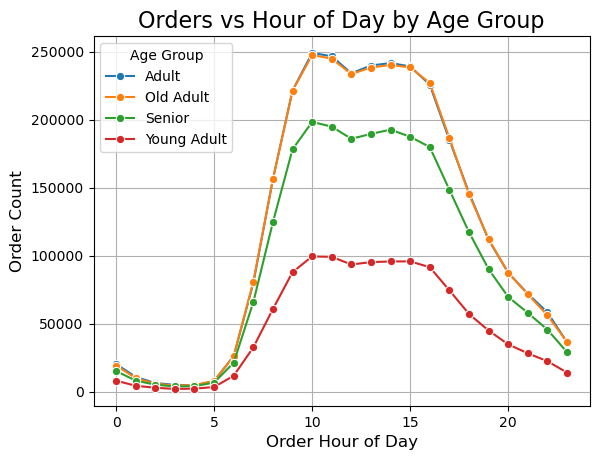

In [182]:
# Creating line plots for different Age groups of their shoppinh vs hour of day

order_hour_line = sns.lineplot(data = df_line_2, x='order_hour_of_day', y = 'count', hue = 'age_group', marker='o')
plt.title('Orders vs Hour of Day by Age Group', fontsize=16)
plt.xlabel('Order Hour of Day', fontsize=12)
plt.ylabel('Order Count', fontsize=12)
plt.legend(title='Age Group')
plt.grid(True)
plt.show()

In [178]:
# Exporting linechart
order_hour_line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'lineplot_order_hour_vs_price_small_age.png'))

In [184]:
# Only get the columns needed for the line chart order day
df_line_day = small[['order_day_of_week', 'prices', 'age_group']]
df_line_day_2 = df_line_day.groupby(['order_day_of_week', 'age_group']).size().reset_index(name='count')

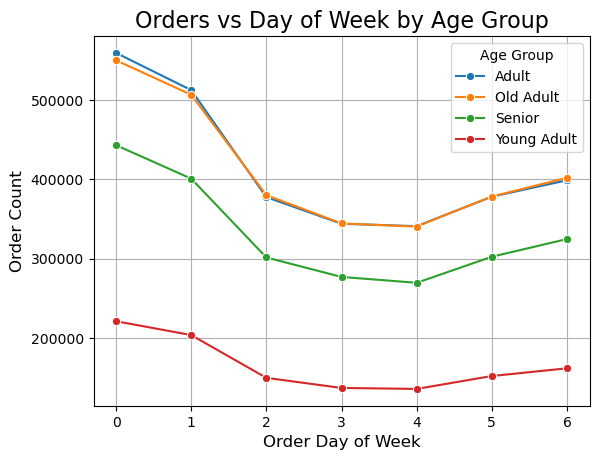

In [186]:
# Creating line plots for different Age groups of their shopping vs day of week

order_day_line = sns.lineplot(data = df_line_day_2, x='order_day_of_week', y = 'count', hue = 'age_group', marker='o')
plt.title('Orders vs Day of Week by Age Group', fontsize=16)
plt.xlabel('Order Day of Week', fontsize=12)
plt.ylabel('Order Count', fontsize=12)
plt.legend(title='Age Group')
plt.grid(True)
plt.show()

#### Note: 0 = Saturday, 1 = Sunday, 2 = Monday, 3 = Tuesday, 4 = Wednesday, 5 = Thursday, 6 = Friday

In [189]:
# Exporting linechart
order_day_line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'lineplot_order_day_vs_price_small_age.png'))

# 06 Create a customer profile dataframe for marketing 

In [100]:
df.columns

Index(['order_id', 'user_id', 'order_number', 'order_day_of_week',
       'order_hour_of_day', 'days_from_last_order', 'new_customer',
       'product_id', 'add_to_cart_order', 'reordered', 'product_name',
       'aisle_id', 'department_id', 'prices', 'merge_2', 'price_range_loc',
       'busiest_day', 'busiest_days_new', 'busiest_period_of_day', 'max_order',
       'loyalty_flag', 'ave_spent', 'spender', 'median_days_to_order',
       'frequent_cust', 'gender', 'state', 'age', 'date_joined', 'dependants',
       'fam_status', 'income', 'region', 'age_group', 'income_group',
       'dependants_flag'],
      dtype='object')

In [109]:
# Create a new dataframe

customer_profile = df.groupby(['user_id','order_number','loyalty_flag','frequent_cust','spender','region','age_group','gender','income_group','fam_status','dependants_flag','days_from_last_order'])['prices'].sum().reset_index()

In [102]:
customer_profile.shape

(2901753, 13)

In [103]:
customer_profile.head()

,user_id,order_number,loyalty_flag,frequent_cust,spender,region,age_group,gender,income_group,fam_status,dependants_flag,days_from_last_order,prices
0,1,2,New customer,Non-frequent customer,Low spender,Region 3,Adult,Female,Middle,married,Has Dependants,15.0,35.4
1,1,3,New customer,Non-frequent customer,Low spender,Region 3,Adult,Female,Middle,married,Has Dependants,21.0,28.2
2,1,4,New customer,Non-frequent customer,Low spender,Region 3,Adult,Female,Middle,married,Has Dependants,29.0,26.0
3,1,5,New customer,Non-frequent customer,Low spender,Region 3,Adult,Female,Middle,married,Has Dependants,28.0,57.0
4,1,6,New customer,Non-frequent customer,Low spender,Region 3,Adult,Female,Middle,married,Has Dependants,19.0,25.0


In [110]:
# Rename prices columns
customer_profile.rename(columns = {'prices' : 'order_total_sum'}, inplace = True)

In [105]:
customer_profile.describe()

,order_number,days_from_last_order,order_total_sum
count,2.901753e+06,2.901753e+06,2.901753e+06
mean,1.887206e+01,1.038571e+01,7.866671e+01
std,1.794091e+01,8.730610e+00,6.009271e+01
min,2.000000e+00,0.000000e+00,0.000000e+00
25%,6.000000e+00,4.000000e+00,3.470000e+01
50%,1.300000e+01,7.000000e+00,6.440000e+01
75%,2.600000e+01,1.400000e+01,1.074000e+02
max,9.900000e+01,3.000000e+01,1.092200e+03


# 07 Stats on New Customer Dataframe

## Stats on customer age

In [107]:
age_stat = customer_profile.groupby('age_group').agg({'days_from_last_order':['mean','min','max'],'order_total_sum':['mean','min','max']})    

In [108]:
age_stat

days_from_last_order            order_total_sum             
                            mean  min   max            mean  min     max
age_group                                                               
Adult                  10.400522  0.0  30.0       78.902503  0.0   829.2
Old Adult              10.387180  0.0  30.0       78.632479  0.0  1092.2
Senior                 10.367963  0.0  30.0       78.314128  0.0   751.1
Young Adult            10.380577  0.0  30.0       78.871569  0.0   842.1

## Stats on income

In [110]:
income_stat = customer_profile.groupby('income_group').agg({'days_from_last_order':['mean','min','max'],'order_total_sum':['mean','min','max']})  

In [111]:
income_stat

days_from_last_order            order_total_sum             
                             mean  min   max            mean  min     max
income_group                                                             
High                    10.132132  0.0  30.0       84.001920  0.0  1047.4
Low                     11.678222  0.0  30.0       50.653688  1.0   712.0
Middle                  10.403501  0.0  30.0       78.299758  0.0  1092.2

## Stats on Familial status

In [113]:
family_stat = customer_profile.groupby(['fam_status','dependants_flag']).agg({'days_from_last_order':['mean','min','max'],'order_total_sum':['mean','min','max']})  

In [114]:
family_stat

days_from_last_order       \
                                                                 mean  min   
fam_status                       dependants_flag                             
divorced/widowed                 No Dependants              10.352674  0.0   
living with parents and siblings Has Dependants             10.301481  0.0   
married                          Has Dependants             10.394092  0.0   
single                           No Dependants              10.391328  0.0   

                                                       order_total_sum       \
                                                   max            mean  min   
fam_status                       dependants_flag                              
divorced/widowed                 No Dependants    30.0       78.935329  0.0   
living with parents and siblings Has Dependants   30.0       79.416970  1.0   
married                          Has Dependants   30.0       78.681855  0.0   
single                           No Dependants    30.0       78.248188  0.0   

                                                          
                                                     max  
fam_status                       dependants_flag          
divorced/widowed                 No Dependants     875.0  
living with parents and siblings Has Dependants    750.3  
married                          Has Dependants   1092.2  
single                           No Dependants     712.0

In [293]:
# Export customer profile dataframe
customer_profile.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'customer_profile_20241118.pkl'))

# 08 Departments - Add new Dataframe

In [113]:
# Importing department dataframe
dept = pd.read_csv(os.path.join(path,'02 Data','Prepared Data','departments_wrangled.csv'))

In [114]:
dept.head()

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [115]:
# Rename unnamed column

dept.rename(columns ={'Unnamed: 0' : 'department_id'}, inplace = True)

In [116]:
dept.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [117]:
# Merge dept with df dataframe

df_dept = df.merge(dept, on = 'department_id', indicator = True)

In [132]:
df_dept.shape

(30964564, 38)

In [133]:
df_dept.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_from_last_order,new_customer,product_id,add_to_cart_order,reordered,...,date_joined,dependants,fam_status,income,region,age_group,income_group,dependants_flag,department,_merge
0,2539329,1,1,2,8,NaN,True,196,1,0,...,2/17/2019,3,married,40423,Region 3,Adult,Middle,Has Dependants,beverages,both
1,2539329,1,1,2,8,NaN,True,14084,2,0,...,2/17/2019,3,married,40423,Region 3,Adult,Middle,Has Dependants,dairy eggs,both
2,2539329,1,1,2,8,NaN,True,12427,3,0,...,2/17/2019,3,married,40423,Region 3,Adult,Middle,Has Dependants,snacks,both
3,2539329,1,1,2,8,NaN,True,26088,4,0,...,2/17/2019,3,married,40423,Region 3,Adult,Middle,Has Dependants,snacks,both
4,2539329,1,1,2,8,NaN,True,26405,5,0,...,2/17/2019,3,married,40423,Region 3,Adult,Middle,Has Dependants,household,both


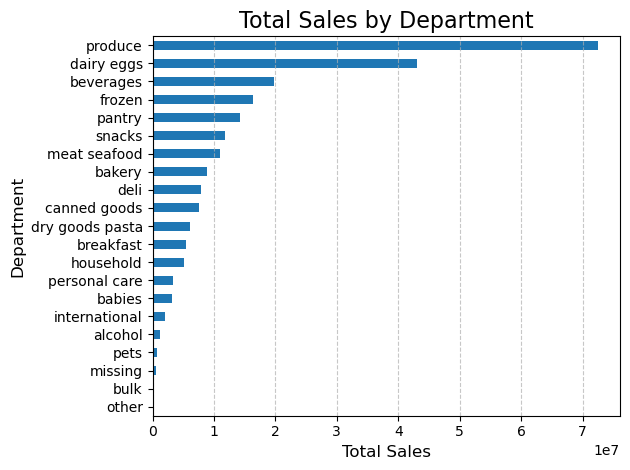

In [181]:
# Sales per department
dept_sales = df_dept.groupby('department')['prices'].sum().sort_values().plot.barh()
plt.title('Total Sales by Department', fontsize=16)
plt.xlabel('Total Sales', fontsize=12)
plt.ylabel('Department', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

In [380]:
# Export the plot
dept_sales.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_dept_sales.png'))

# 09 Regional Comparison

## Sales per Region

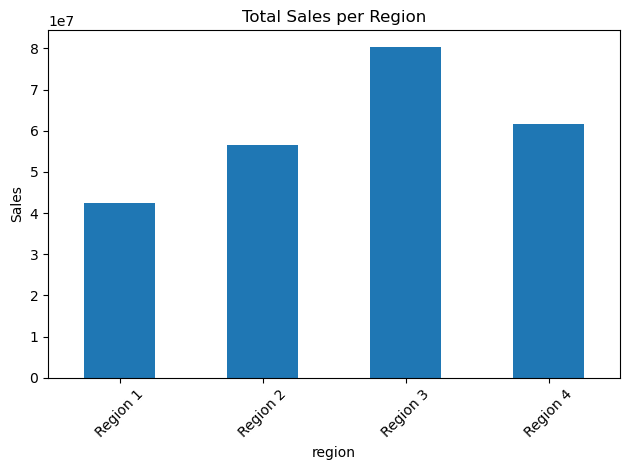

In [278]:
# Create bar graph of total sales per region
#Aggregate counts, group by region and sum of prices

total_sales_per_region = df_dept.groupby('region')['prices'].sum()
total_sales_per_region.plot.bar(stacked=False)

plt.title('Total Sales per Region')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.tight_layout()

#Export bar chart
plt.savefig(os.path.join(path, '04 Analysis','Visualizations','bar_regional_sales.png'))

## Per age group

In [123]:
# Create customer profile dataframe with unique user_ids only

df_dept_unique = df_dept.drop_duplicates(subset='user_id')

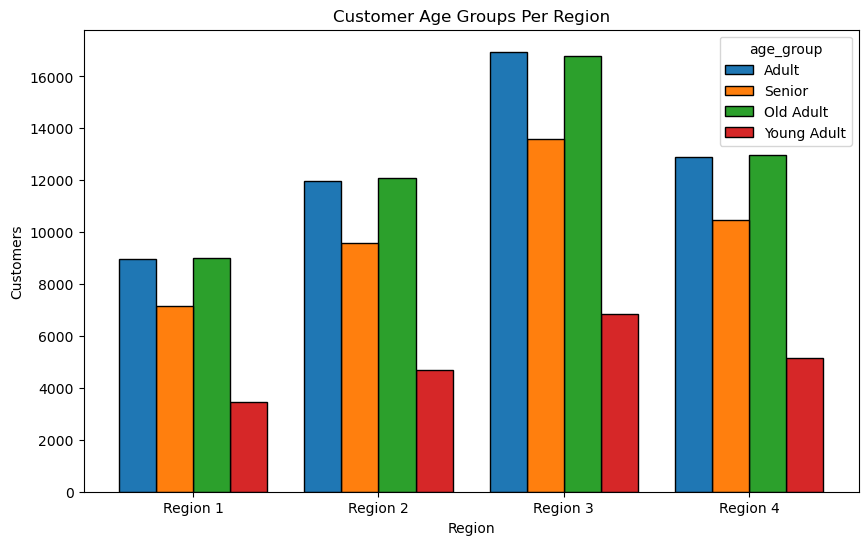

In [177]:
# Create bar graph of age groups per region
#Aggregate counts, group by region and age group

# Define the desired order of regions
desired_order = ['Region 1', 'Region 2', 'Region 3', 'Region 4']

# Convert 'region' column to a categorical type with the desired order
df_dept_unique.loc[:, 'region'] = pd.Categorical(df_dept_unique['region'],categories=desired_order,ordered=True)

# Plotting Histogram for age group and region comparison
plt.figure(figsize=(10, 6))
sns.histplot(data=df_dept_unique, x='region', hue='age_group', multiple='dodge', shrink=.8, alpha=1)

# Customize
plt.title('Customer Age Groups Per Region')
plt.ylabel('Customers')
plt.xlabel('Region')
# Save and show
plt.savefig(os.path.join(path,'04 Analysis','Visualizations','bar_region_age.png'), bbox_inches = 'tight')
plt.show()

## Sales per Region by customer type

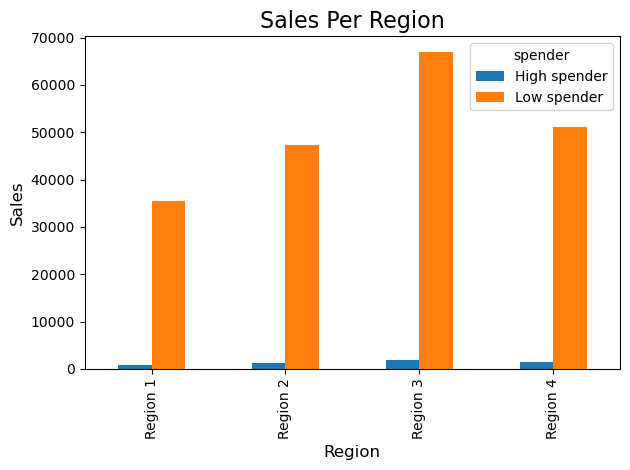

In [140]:
#Export bar chart

bar_spender = crosstab_spender.plot.bar(stacked =False)

plt.title('Sales Per Region', fontsize=16)
plt.ylabel('Sales', fontsize=12)
plt.xlabel('Region', fontsize=12)
plt.tight_layout()

#Export bar chart
bar_spender.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','bar_region_spender.png'))

## Per income group

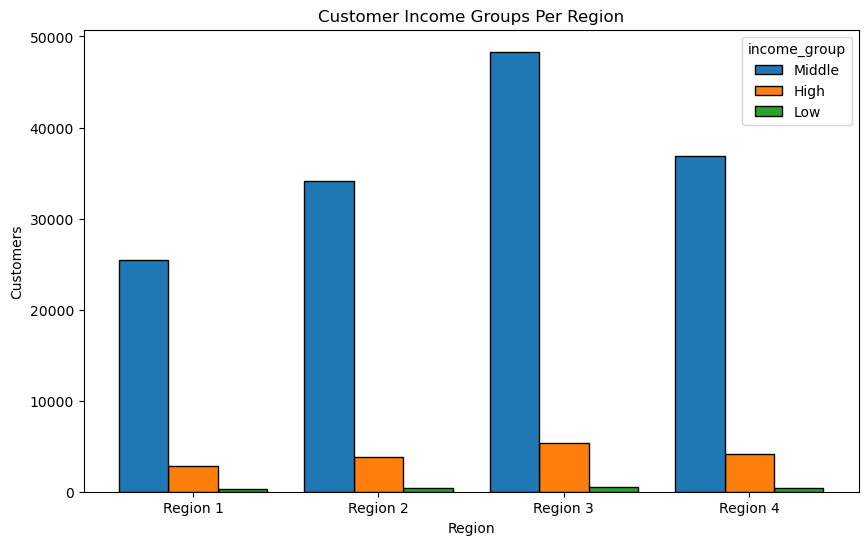

In [180]:
# Create bar graph of age groups per region
#Aggregate counts, group by region and age group

# Define the desired order of regions
desired_order = ['Region 1', 'Region 2', 'Region 3', 'Region 4']

# Convert 'region' column to a categorical type with the desired order
df_dept_unique.loc[:, 'region'] = pd.Categorical(df_dept_unique['region'],categories=desired_order,ordered=True)

# Plotting Histogram for age group and region comparison
plt.figure(figsize=(10, 6))
sns.histplot(data=df_dept_unique, x='region', hue='income_group', multiple='dodge', shrink=.8, alpha=1)

# Customize
plt.title('Customer Income Groups Per Region')
plt.ylabel('Customers')
plt.xlabel('Region')
# Save and show
plt.savefig(os.path.join(path,'04 Analysis','Visualizations','bar_region_income.png'), bbox_inches = 'tight')
plt.show()

## Loyal Customers per Region

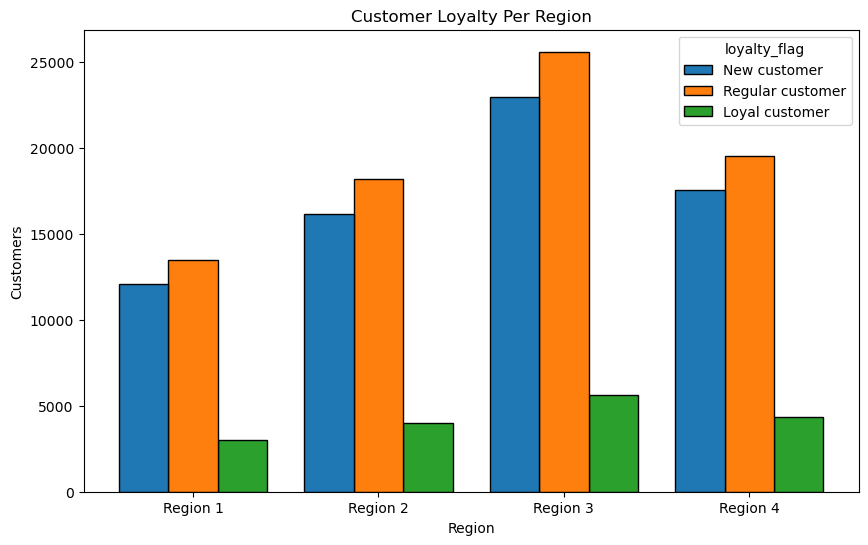

In [183]:
# Create bar graph of loyal customers per region
#Aggregate counts, group by region and loyalty

# Define the desired order of regions
desired_order = ['Region 1', 'Region 2', 'Region 3', 'Region 4']

# Convert 'region' column to a categorical type with the desired order
df_dept_unique.loc[:, 'region'] = pd.Categorical(df_dept_unique['region'],categories=desired_order,ordered=True)

# Plotting Histogram for age group and region comparison
plt.figure(figsize=(10, 6))
sns.histplot(data=df_dept_unique, x='region', hue='loyalty_flag', multiple='dodge', shrink=.8, alpha=1)

# Customize
plt.title('Customer Loyalty Per Region')
plt.ylabel('Customers')
plt.xlabel('Region')
# Save and show
plt.savefig(os.path.join(path,'04 Analysis','Visualizations','bar_region_loyalty.png'), bbox_inches = 'tight')
plt.show()

## Customer Genders per Region

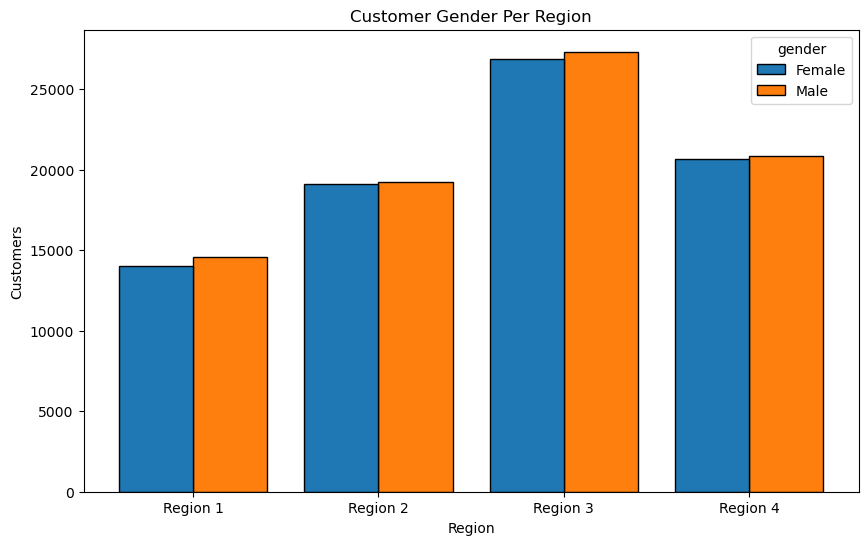

In [186]:
# Create bar graph of customer gender per region
#Aggregate counts, group by region and gender

# Define the desired order of regions
desired_order = ['Region 1', 'Region 2', 'Region 3', 'Region 4']

# Convert 'region' column to a categorical type with the desired order
df_dept_unique.loc[:, 'region'] = pd.Categorical(df_dept_unique['region'],categories=desired_order,ordered=True)

# Plotting Histogram for age group and region comparison
plt.figure(figsize=(10, 6))
sns.histplot(data=df_dept_unique, x='region', hue='gender', multiple='dodge', shrink=.8, alpha=1)

# Customize
plt.title('Customer Gender Per Region')
plt.ylabel('Customers')
plt.xlabel('Region')
# Save and show
plt.savefig(os.path.join(path,'04 Analysis','Visualizations','bar_region_gender.png'), bbox_inches = 'tight')
plt.show()

## Per Familial Status

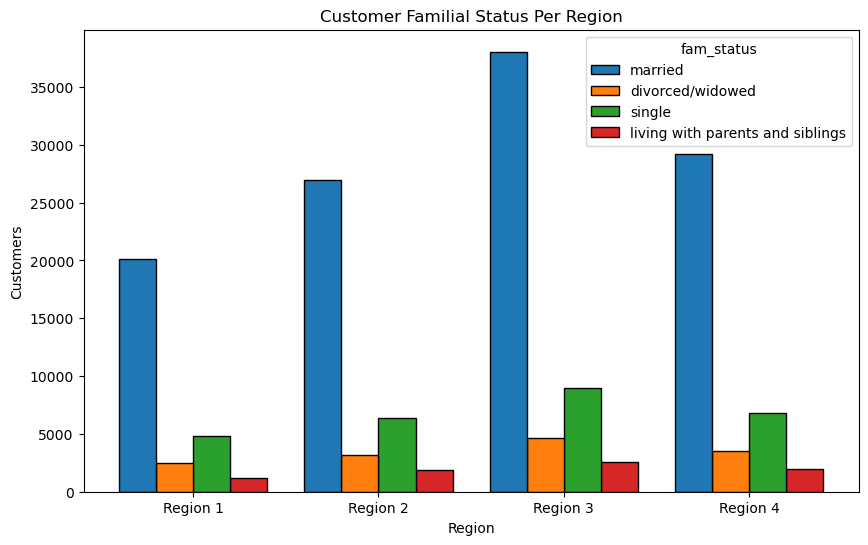

In [188]:
# Create bar graph of customer familial status per region
#Aggregate counts, group by region and family status

# Define the desired order of regions
desired_order = ['Region 1', 'Region 2', 'Region 3', 'Region 4']

# Convert 'region' column to a categorical type with the desired order
df_dept_unique.loc[:, 'region'] = pd.Categorical(df_dept_unique['region'],categories=desired_order,ordered=True)

# Plotting Histogram for age group and region comparison
plt.figure(figsize=(10, 6))
sns.histplot(data=df_dept_unique, x='region', hue='fam_status', multiple='dodge', shrink=.8, alpha=1)

# Customize
plt.title('Customer Familial Status Per Region')
plt.ylabel('Customers')
plt.xlabel('Region')
# Save and show
plt.savefig(os.path.join(path,'04 Analysis','Visualizations','bar_region_family.png'), bbox_inches = 'tight')
plt.show()

# 10 Products bought 
## per Age group

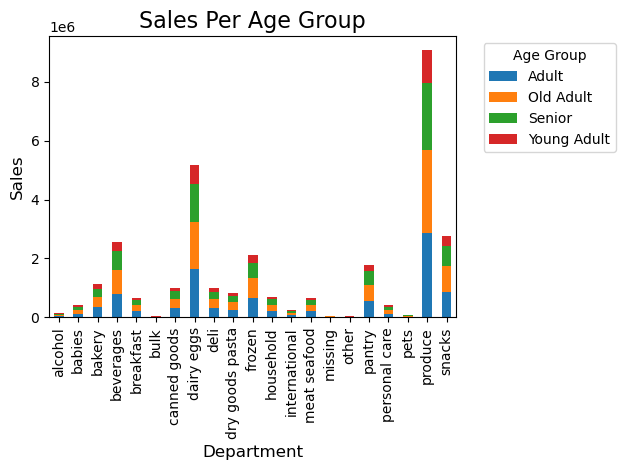

In [232]:
# Create stacked bars with age_group and department
# Crosstab of department vs age_group columns

crosstab_age_dept = pd.crosstab(df_dept['department'], df_dept['age_group'], dropna = False)
stackedbar_age_dept = crosstab_age_dept.plot.bar(stacked =True)

plt.title('Sales Per Age Group', fontsize=16)
plt.xlabel('Department', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

#Export bar chart
stackedbar_age_dept.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','stackedbar_dept_age.png'))



## Per income

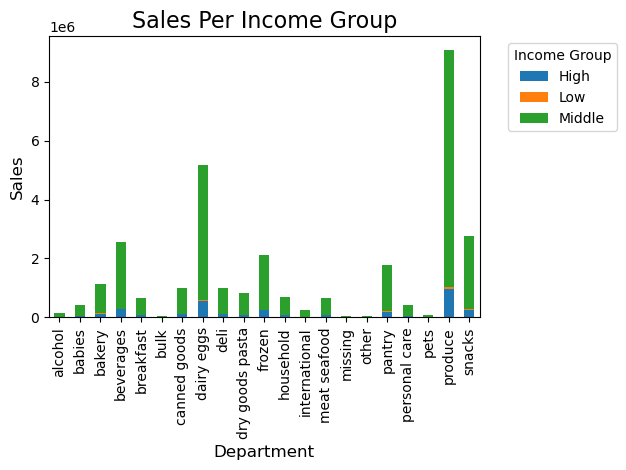

In [234]:
# Create stacked bars with income_group and department
# Crosstab of department vs income_group columns

crosstab_income_dept = pd.crosstab(df_dept['department'], df_dept['income_group'], dropna = False)
stackedbar_income_dept = crosstab_income_dept.plot.bar(stacked =True)

plt.title('Sales Per Income Group', fontsize=16)
plt.xlabel('Department', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.legend(title='Income Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

#Export bar chart
stackedbar_income_dept.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','stackedbar_dept_income.png'))


## per Gender

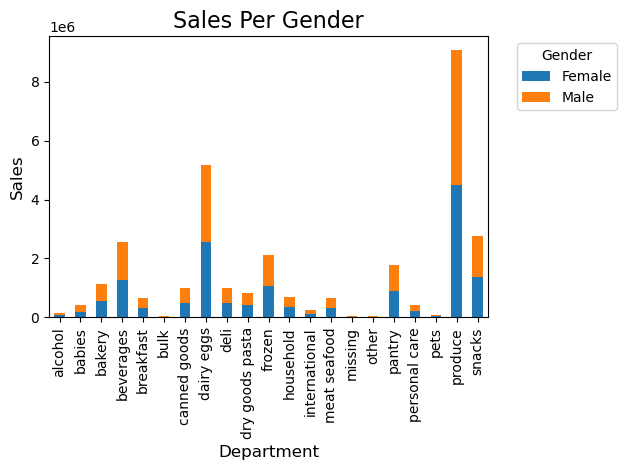

In [236]:
# Create stacked bars with gender and department
# Crosstab of department vs genderp columns

crosstab_gender_dept = pd.crosstab(df_dept['department'], df_dept['gender'], dropna = False)
stackedbar_gender_dept = crosstab_gender_dept.plot.bar(stacked =True)

plt.title('Sales Per Gender', fontsize=16)
plt.xlabel('Department', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.legend(title='Gender', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

#Export bar chart
stackedbar_gender_dept.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','stackedbar_dept_gender.png'))


## Per frequent customer

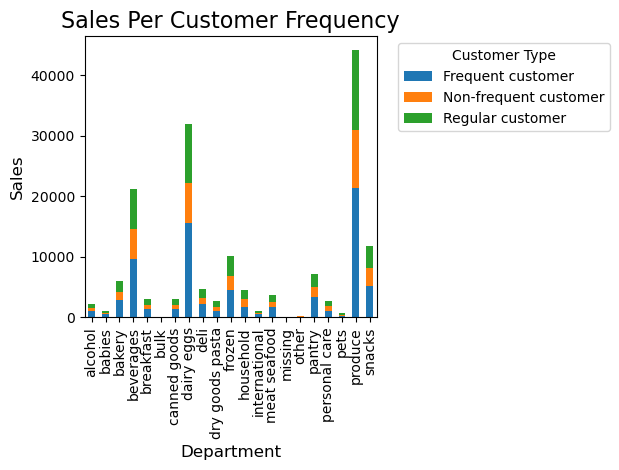

In [199]:
# Create stacked bars with frequent_cust and department
# Crosstab of department vs frequent_cust columns

crosstab_freq_dept = pd.crosstab(df_dept_unique['department'], df_dept_unique['frequent_cust'], dropna = False)
stackedbar_freq_dept = crosstab_freq_dept.plot.bar(stacked =True)

plt.title('Sales Per Customer Frequency', fontsize=16)
plt.xlabel('Department', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.legend(title='Customer Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

#Export bar chart
stackedbar_freq_dept.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','stackedbar_dept_freq.png'))


## Per region

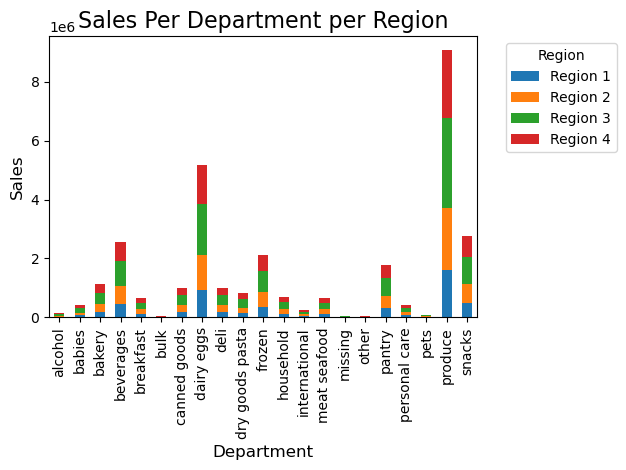

In [255]:
# Create stacked bars with region and department
# Crosstab of department vs region columns

crosstab_region_dept = pd.crosstab(df_dept['department'], df_dept['region'], dropna = False)
stackedbar_region_dept = crosstab_region_dept.plot.bar(stacked =True)

plt.title('Sales Per Department per Region', fontsize=16)
plt.xlabel('Department', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

#Export bar chart
stackedbar_region_dept.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','stackedbar_dept_region.png'))


## Per Price_range

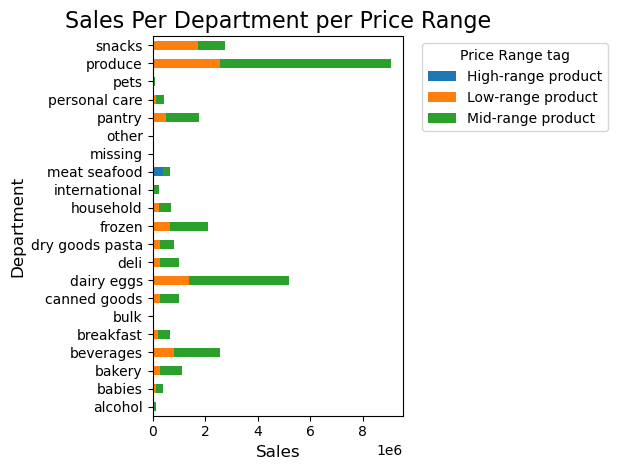

In [185]:
# Create stacked bars with region and department
# Crosstab of department vs region columns

crosstab_price_dept = pd.crosstab(df_dept['department'], df_dept['price_range_loc'], dropna = False)
stackedbar_price_dept = crosstab_price_dept.plot.barh(stacked =True)

plt.title('Sales Per Department per Price Range', fontsize=16)
plt.xlabel('Sales', fontsize=12)
plt.ylabel('Department', fontsize=12)
plt.legend(title='Price Range tag', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

#Export bar chart
stackedbar_price_dept.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','stackedbar_dept_price.png'))

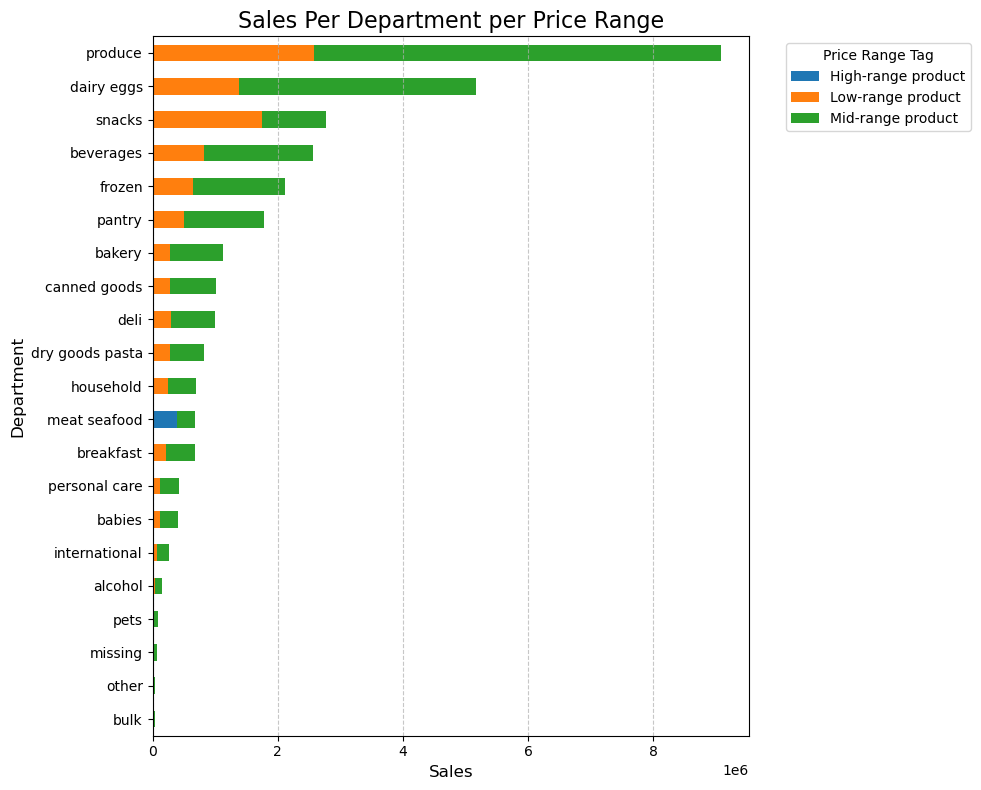

In [197]:

# Create crosstab of department vs price_range_loc
crosstab_price_dept_2 = pd.crosstab(df_dept['department'], df_dept['price_range_loc'], dropna=False)

# Sort departments by total sales in descending order
crosstab_price_dept_2['Total'] = crosstab_price_dept_2.sum(axis=1)  # Add a total column for sorting
crosstab_price_dept_2 = crosstab_price_dept_2.sort_values('Total', ascending=True)
crosstab_price_dept_2 = crosstab_price_dept_2.drop(columns='Total')  # Remove the 'Total' column after sorting

# Plot horizontal stacked bars
stackedbar_price_dept = crosstab_price_dept_2.plot.barh(stacked=True, figsize=(10, 8))

# Customize the plot
plt.title('Sales Per Department per Price Range', fontsize=16)
plt.xlabel('Sales', fontsize=12)
plt.ylabel('Department', fontsize=12)
plt.legend(title='Price Range Tag', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

# Export the bar chart
stackedbar_price_dept.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','stackedbar_dept_price2.png'))

# Show the plot
plt.show()


# 11 Proportion of Sales of Items per Region

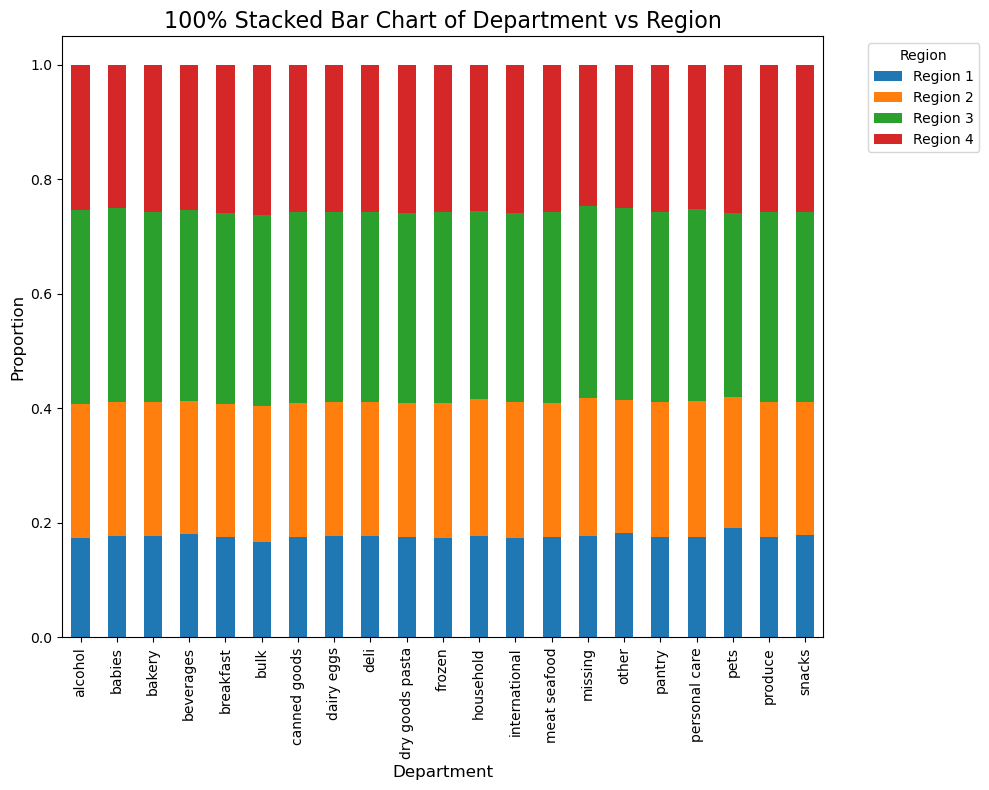

In [226]:
# Create stacked bars with region and department
# Crosstab of department vs region columns
crosstab_dept_region = pd.crosstab(df_dept['department'], df_dept['region'], dropna=False)

# Normalize by dividing each row by the row sum (to get proportions)
crosstab_dept_region_norm = crosstab_dept_region.div(crosstab_dept_region.sum(axis=1), axis=0)

# Step 3: Plot 100% stacked bar chart
ax = crosstab_dept_region_norm.plot(kind='bar', stacked=True, figsize=(10, 8))

# Customize
plt.title('100% Stacked Bar Chart of Department vs Region', fontsize=16)
plt.xlabel('Department', fontsize=12)
plt.ylabel('Proportion', fontsize=12)
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Save and display the plot
plt.savefig('stackedbar_dept_region.png', bbox_inches='tight')
plt.show()

# 12 Customer Profile with multiple factors
## Age vs Income

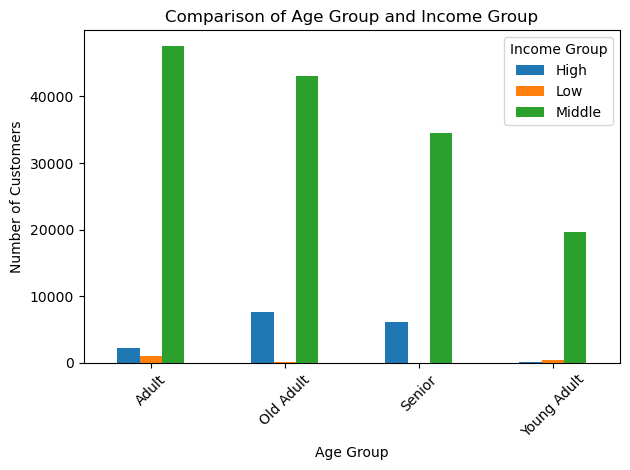

In [218]:
# Create stacked bars with age and income
# Crosstab of age vs income columns

crosstab_age_income = pd.crosstab(df_dept_unique['age_group'], df_dept_unique['income_group'], dropna = False)
bar_age_income = crosstab_age_income.plot.bar(stacked =False)

plt.title('Comparison of Age Group and Income Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.legend(title='Income Group')
plt.tight_layout()

#Export bar chart
bar_age_income.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','bar_age_income.png'))


In [220]:
crosstab_age_income

income_group,High,Low,Middle
age_group,,,
Adult,2273,967,47559
Old Adult,7654,71,43141
Senior,6180,41,34548
Young Adult,122,483,19592


## Age vs Dependants

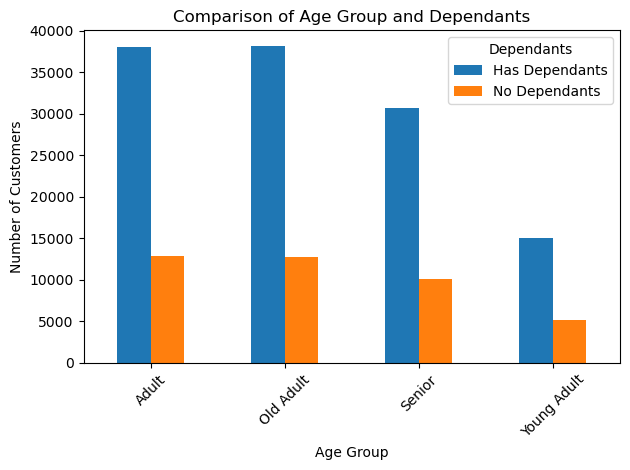

In [223]:
# Create stacked bars with age and dependants
# Crosstab of age vs dependants columns

crosstab_age_dependants = pd.crosstab(df_dept_unique['age_group'], df_dept_unique['dependants_flag'], dropna = False)
bar_age_dependants = crosstab_age_dependants.plot.bar(stacked =False)

plt.title('Comparison of Age Group and Dependants')
plt.xlabel('Age Group')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.legend(title='Dependants')
plt.tight_layout()

#Export bar chart
bar_age_dependants.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','bar_age_dependants.png'))

## Age vs Loyalty

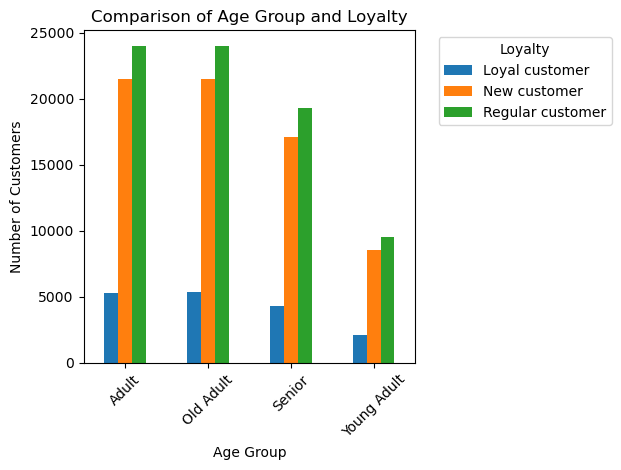

In [243]:
# Create stacked bars with age and loyalty
# Crosstab of age vs loyalty columns

crosstab_age_loyalty = pd.crosstab(df_dept_unique['age_group'], df_dept_unique['loyalty_flag'], dropna = False)
bar_age_loyalty = crosstab_age_loyalty.plot.bar(stacked =False)

plt.title('Comparison of Age Group and Loyalty')
plt.xlabel('Age Group')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.legend(title='Loyalty', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

#Export bar chart
bar_age_loyalty.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','bar_age_loyalty.png'))

## Loyalty vs Income

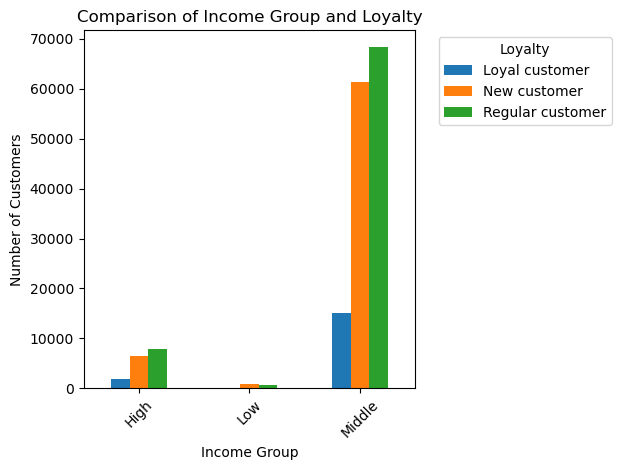

In [246]:
# Create stacked bars with income and loyalty
# Crosstab of income vs loyalty columns

crosstab_income_loyalty = pd.crosstab(df_dept_unique['income_group'], df_dept_unique['loyalty_flag'], dropna = False)
bar_income_loyalty = crosstab_income_loyalty.plot.bar(stacked =False)

plt.title('Comparison of Income Group and Loyalty')
plt.xlabel('Income Group')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.legend(title='Loyalty', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

#Export bar chart
bar_income_loyalty.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','bar_income_loyalty.png'))

# 13 Spending Habits
## Per Age Group

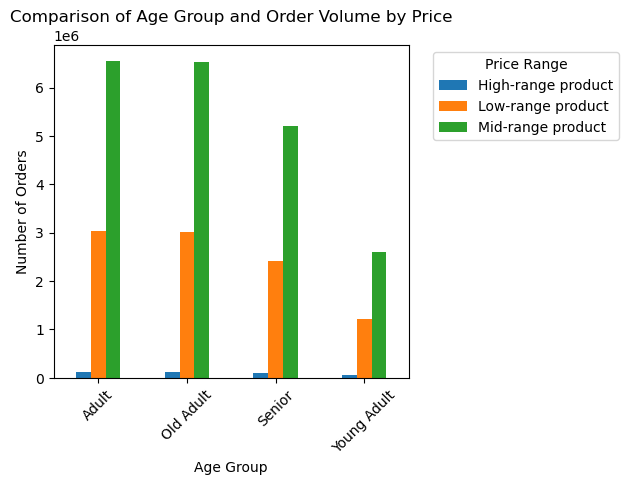

In [251]:
# Create stacked bars with age and order volume
# Crosstab of age vs dependants columns

crosstab_age_orders = pd.crosstab(df_dept['age_group'], df_dept['price_range_loc'], dropna = False)
bar_age_orders = crosstab_age_orders.plot.bar(stacked =False)

plt.title('Comparison of Age Group and Order Volume by Price')
plt.xlabel('Age Group')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.legend(title='Price Range', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

#Export bar chart
bar_age_orders.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','bar_age_orders.png'))

## Per income group

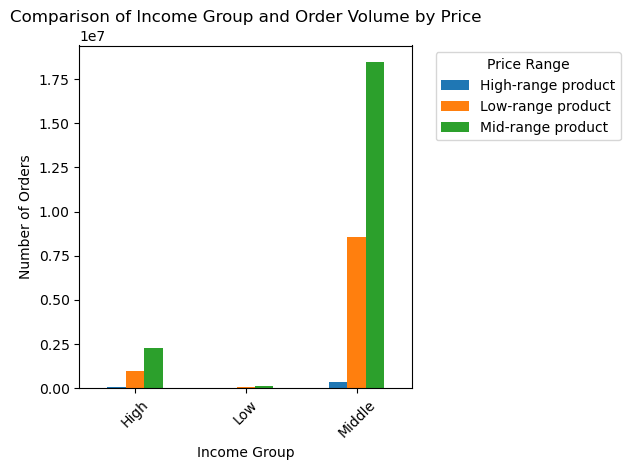

In [253]:
# Create stacked bars with income and order volume
# Crosstab of income vs price_loc columns

crosstab_income_orders = pd.crosstab(df_dept['income_group'], df_dept['price_range_loc'], dropna = False)
bar_income_orders = crosstab_income_orders.plot.bar(stacked =False)

plt.title('Comparison of Income Group and Order Volume by Price')
plt.xlabel('Income Group')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.legend(title='Price Range', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

#Export bar chart
bar_income_orders.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','bar_income_orders.png'))

## Loyalty spending

In [155]:
# Sum order_total by loyalty
loyalty_order = df.groupby('loyalty_flag')['prices'].sum().sort_values(ascending = False).reset_index()
loyalty_order

,loyalty_flag,prices
0,Regular customer,123790606.2
1,Loyal customer,79933825.2
2,New customer,37469804.2


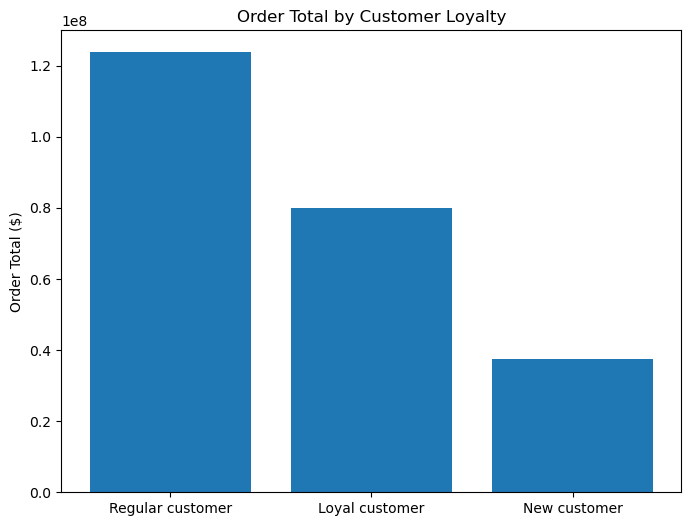

In [157]:
# Set up formatting and colours
plt.figure(figsize=(8, 6))

# Plot bars
bars_loyalty_order = plt.bar(loyalty_order['loyalty_flag'], loyalty_order['prices'])
plt.title("Order Total by Customer Loyalty")
plt.xlabel("")
plt.xticks(rotation=0)
plt.ylabel("Order Total ($)")

plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bars_loyalty_order.png'), bbox_inches = 'tight')

## Age Group vs Family Status Habits

In [162]:
# Group by family status and age group, summing the order count
grouped_habits = df.groupby(['fam_status', 'age_group'])['order_number'].sum().reset_index()


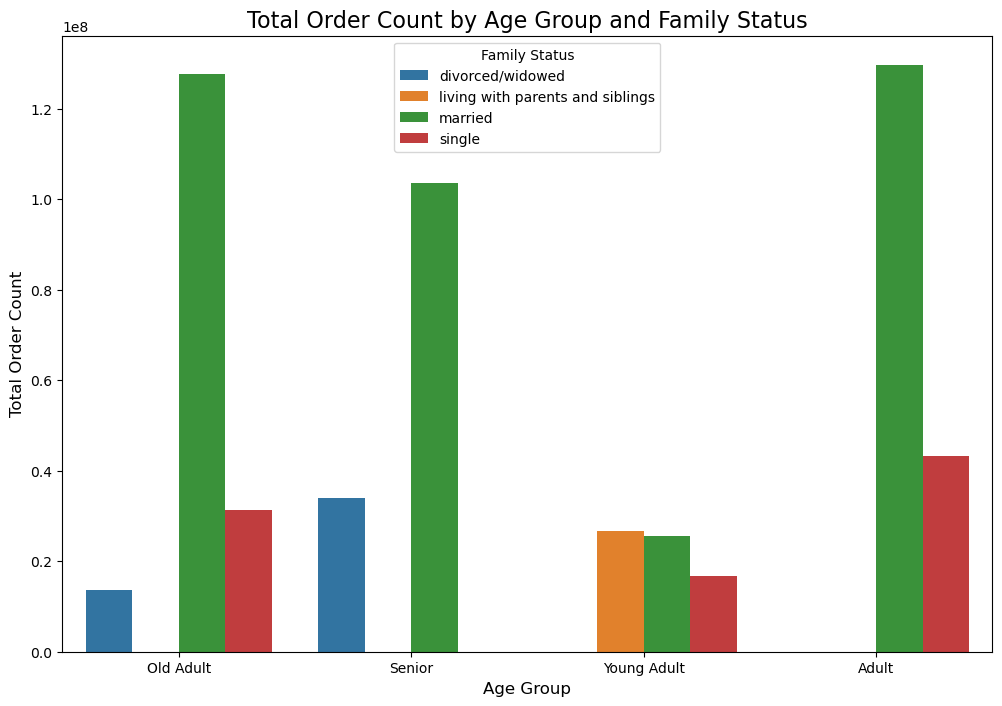

In [174]:
plt.figure(figsize=(12, 8))

# Bar plot
sns.barplot(data=grouped_habits,x='age_group', y='order_number', hue='fam_status')

plt.title("Total Order Count by Age Group and Family Status", fontsize=16)
plt.xlabel("Age Group", fontsize=12)
plt.ylabel("Total Order Count", fontsize=12)
plt.legend(title="Family Status", fontsize=10)


plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bars_age_fam.png'), dpi=300, bbox_inches="tight")

# 14 Exporting Latest Dataframe

In [126]:
df_dept.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'customer_profile_dept.pkl'))